/usr/local/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /usr/local/anaconda/lib/python2.7/argparse.pyc, but /usr/local/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream
/usr/local/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


Computer: lintu.ucsd.edu


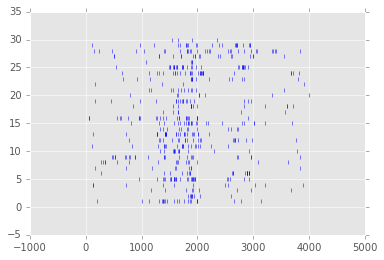

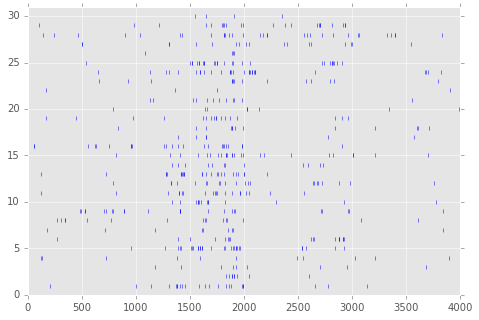

In [1]:
#read a wav file, try to filter it, show spectrogram, find finch-like song
%matplotlib inline
import h5py

import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os
import wave
import struct
import glob

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
print 'Computer: ' + comp_name
if  comp_name == 'chim':
    #sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join(os.path.abspath('W:') , "earneodo", "bci_zf")
elif  'lookfar' in comp_name:
    sys.path.append('/Users/zeke/repos/ephysflow/basic_viewing')
    sys.path.append('/Users/zeke/repos/soundflow/sound_tools')
    experiment_folder = os.path.join(os.path.abspath('/Volumes') , 'gentner', 'earneodo', 'bci_zf')

if 'lintu' in comp_name:
    sys.path.append('/mnt/cube/earneodo/repos/soundflow/sound_tools')
    sys.path.append('/mnt/cube/earneodo/repos/ephysflow/basic_viewing')
    sys.path.append('/mnt/cube/earneodo/repos/ephysflow')
    experiment_folder = os.path.join('/mnt/cube/earneodo/bci_zf/')
    raw_data_folder = os.path.join(experiment_folder, 'raw_data')

from phy_tools import kwik_functions as kwik
from events import Event, Sound
from units import Unit
import basic_plot as bp

raw_data_folder = os.path.join(experiment_folder, 'raw_data')
ss_data_folder = os.path.join(experiment_folder, 'ss_data')



#file structure
bird_id = 'z003'
sess = 1
rec = 'a'
run = 1
sess_name = 'Pen03_Lft_AP500_ML500__Site01_Z2000__z003_cat_P03_S01_1_02'

raw_file_folder = os.path.join(raw_data_folder, bird_id, str(sess).zfill(3))
raw_file_name = rec + '_' + str(run).zfill(2) + '_song.wav'
raw_file_path = os.path.join(raw_file_folder, raw_file_name)
ss_file_folder = raw_file_folder = os.path.join(ss_data_folder, bird_id, 'post_stim_merge', sess_name)


# open the kwik file for playing
kwik_files = [f for f in os.listdir(ss_file_folder) if f.endswith('.kwik')]
kwik_file = kwik_files[0]

f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r')
f['/event_types/Stimulus'].keys()
stim = Sound('sound_001_40000', h5=f)

stim.get_col('name')


unit = Unit(22, h5=f)
unit.get_time_stamps()
unit.get_sampling_rate()
rs = unit.get_raster(stim.get_col('start')-32500, 4000, span_is_ms=True, return_ms=True)


b = np.outer((np.arange(rs.shape[0]) + 1), np.ones(rs.shape[1]))
plt.scatter(rs, b, marker='|')

bp.plot_raster(bp.sparse_raster(rs))
f.close()

In [2]:
# append all the stimuli to a kwik file
from phy_tools import kwik_functions as kwik
#f.close()
from scipy.io import wavfile
# add wave stimuli
# Insert a wav file with a sound into a group


#kwik_file = '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_man_sort/Pen01_Lft_AP1000_ML2000__Site02_Z1000__z003_cat_P01_S02_1/z003_cat_P01_S02_1.kwik'

stim_files_fold = '/mnt/cube/earneodo/bci_zf/stim_data/z003/set_001/resampled_sound/'
stim_files_list = [f for f in os.listdir(stim_files_fold) if f.endswith('.wav')]

f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r+')

for wav_file in stim_files_list:
    if wav_file.split('.')[0].split('_')[1] in ['001', '003', '005']:
        meta = {'type' : 'bos'}
    elif wav_file.split('.')[0].split('_')[1] in ['002', '004', '006']:
        meta = {'type' : 'bos_rev'}
    else:
        meta = {'type' : 'cons'}
    
    kwik.insert_sound(f, wav_file.split('.')[0], os.path.join(stim_files_fold, wav_file), stim_meta_data=meta)

f.close()

ValueError: Unable to create group (Name already exists)

In [2]:
f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r')
f['/event_types/Stimulus'].keys()

[u'codes',
 u'recording',
 u'sound_001_40000',
 u'sound_002_40000',
 u'sound_003_40000',
 u'sound_004_40000',
 u'sound_005_40000',
 u'sound_006_40000',
 u'sound_007_40000',
 u'sound_008_40000',
 u'text',
 u'time_samples']

In [2]:
# play with the synthesized song
from phy_tools import kwik_functions as kwik
import scipy.signal as ss
sound = 'sound_005'
parent_group='/event_types/Stimulus'
#get the group of the sound
f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r')
sound_key = [g for g in np.array(f[parent_group].keys()) if sound in g]
sound_group = f[parent_group + '/' + sound_key[0]]
f.close()

#get the files:
set_folder = os.path.abspath('/mnt/cube/earneodo/bci_zf/stim_data/z003/set_001/')

# Make a dictionary of the tables to load
to_append = {'synthesized': ['song_synth', 0],
            'alpha': ['synth', 2],
            'beta': ['synth', 1],
            'f0': ['f0_smooth', 2]}

f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r+')
for key, val in to_append.iteritems():
    file_name = "{0:s}_{1:s}.dat".format(val[0], sound)
    data = np.loadtxt(os.path.join(set_folder, file_name))
    if len(data.shape) == 1:
        assert(val[1] == 0)
    else:
        data = data[:,val[1]]
    #plt.plot(ss.resample(data, waveform_size))
    kwik.append_stream(f, sound_key[0], data, key, resample=True)
    

f.close()

In [3]:
f.close()

In [4]:
#insert synthesized song streams:
song = np.loadtxt('/mnt/cube/earneodo/bci_zf/stim_data/z003/set_001/song_synth_sound_001.dat')
b=np.loadtxt('/mnt/cube/earneodo/bci_zf/stim_data/z003/set_001/f0_smooth_sound_001.dat')
p=np.loadtxt('/mnt/cube/earneodo/bci_zf/stim_data/z003/set_001/synth_sound_001.dat')

parent_group='/event_types/Stimulus'
f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r')

sound_key = [g for g in np.array(f[parent_group].keys()) if sound in g]
sound_group = f[parent_group + '/' + sound_key[0]]
waveform_size = sound_group['waveform'].size

#resample the input to match the waveform sampling rate (assuming their durations are the same)
a_resampled = ss.resample(a, waveform_size)
f.close()

NameError: name 'sound' is not defined

In [3]:
plt.plot(sound_group['waveform'])
plt.plot(a_resampled)

NameError: name 'sound_group' is not defined

In [4]:
set_folder = os.path.abspath('/mnt/cube/earneodo/bci_zf/stim_data/z003/set_001/')

In [5]:
sound_key

NameError: name 'sound_key' is not defined

In [7]:
sound_key[0]

u'sound_001_40000'

In [8]:
kwik.append_stream(f, sound_key[0], data, key)

In [9]:
f.close()

In [4]:
sound_group.keys()

ValueError: Not a location id (Invalid object id)

In [8]:
# read the stimulus groups from a recording kwik file and put them into a stim.kwik file
stim_set = 1;

stim_data_folder = os.path.join(experiment_folder, 'stim_data', bird_id, 'set_' + str(stim_set).zfill(3))
stim_file = os.path.join(stim_data_folder, 'stim_data.kwik')
kf2 = h5py.File(stim_file, 'w')
kf2.create_group('event_types')
stim_group = kf2['event_types'].create_group('Stimulus')


f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r')
groups = read_stim_groups(f)
#for group in groups:
for group_name, group in groups.iteritems():
    if 'sound' in group_name:
        print group_name
        #f.copy(group, stim_group)

kf2.close()
f.close()

NameError: name 'read_stim_groups' is not defined

In [3]:
# read the stimulus file and copy the stimulus data to a bunch of kwik files
stim_set = 1;
stim_data_folder = os.path.join(experiment_folder, 'stim_data', bird_id, 'set_' + str(stim_set).zfill(3))
stim_file = os.path.join(stim_data_folder, 'sinatra.kwik')
sf = h5py.File(stim_file, 'r')
stim_groups = kwik.read_stim_groups(sf)

# Now open up a session file in r+ mode and introduce those groups
sess_name = 'Pen04_Rgt_AP1500_ML0__Site01_Z1500__z003_cat_P04_S01_1_02'

raw_file_folder = os.path.join(raw_data_folder, bird_id, str(sess).zfill(3))
raw_file_name = rec + '_' + str(run).zfill(2) + '_song.wav'
raw_file_path = os.path.join(raw_file_folder, raw_file_name)
ss_file_folder = os.path.join(ss_data_folder, bird_id, 'post_stim_merge', sess_name)

kwik_files = [f for f in os.listdir(ss_file_folder) if f.endswith('.kwik')]
kwik_file = kwik_files[0]

f = h5py.File(os.path.join(ss_file_folder, kwik_file), 'r+')
stim_target = f['/event_types/Stimulus/sound_005_40000']
print stim_target.keys()

for group_name, group in stim_groups.iteritems():
    if 'sound_005_40000' in group_name:
        print group_name
        #f.copy(group, stim_target)

f.close()
#sf.close()

[u'waveforms']
sound_005_40000


In [6]:
sf['/event_types/Stimulus/sound_005_40000'].keys()

[u'waveforms']

In [8]:
export_path=os.path.join(experiment_folder, 'export_data', 'tejaswy',bird_id)
all_session_paths = glob.glob(os.path.join(ss_data_folder, bird_id, 'post_stim_merge','*'))
all_session_paths

['/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen07_Rgt_AP1250_ML2000__Site03_Z1950__z003_cat_P07_S03_1_02',
 '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen04_Rgt_AP1500_ML0__Site01_Z1500__z003_cat_P04_S01_1_02',
 '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen03_Lft_AP500_ML500__Site02_Z2300__z003_cat_P03_S02_1_02',
 '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen05_Rgt_AP1500_ML2000__Site02_Z2550__z003_cat_P05_S02_1_02',
 '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen03_Lft_AP500_ML500__Site01_Z2000__z003_cat_P03_S01_1_02',
 '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen07_Rgt_AP1250_ML2000__Site02_Z1680__z003_cat_P07_S02_1_02',
 '/mnt/cube/earneodo/bci_zf/ss_data/z003/post_stim_merge/Pen06_Rgt_AP1500_ML2000__Site02_Z2175__z003_cat_P06_S02_1_02']

In [10]:
import shutil

for i, s_path in enumerate(all_session_paths):
    s_name = os.path.split(s_path)[-1]
    target_path = os.path.join(export_path, "S{:03d}_{}".format(sess, s_name))
    
    # chek for the kiwk file
    export_files = glob.glob(os.path.join(s_path, '*.kwik'))
    assert(len(export_files) == 1)
    
    if not os.path.exists(target_path):
        os.makedirs(target_path)
        
    #shutil.copy(export_files[0], target_path)
    
    print target_path

/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen07_Rgt_AP1250_ML2000__Site03_Z1950__z003_cat_P07_S03_1_02
/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen04_Rgt_AP1500_ML0__Site01_Z1500__z003_cat_P04_S01_1_02
/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen03_Lft_AP500_ML500__Site02_Z2300__z003_cat_P03_S02_1_02
/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen05_Rgt_AP1500_ML2000__Site02_Z2550__z003_cat_P05_S02_1_02
/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen03_Lft_AP500_ML500__Site01_Z2000__z003_cat_P03_S01_1_02
/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen07_Rgt_AP1250_ML2000__Site02_Z1680__z003_cat_P07_S02_1_02
/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen06_Rgt_AP1500_ML2000__Site02_Z2175__z003_cat_P06_S02_1_02


In [58]:
export_path

'/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003'

In [25]:
f.close()
sf.close()

In [43]:
os.target_path

'/mnt/cube/earneodo/bci_zf/export_data/tejaswy/z003/S001_Pen06_Rgt_AP1500_ML2000__Site02_Z2175__z003_cat_P06_S02_1_02'

In [59]:
os.path.exists(target_path)

True

In [60]:
assert(len(glob.glob(os.path.join(all_session_paths[0], '*.kwik')))==1)